# A11 - Integracion de montecarlo

René Alejadnro González Velázquez

24 de octubre de 2024

Simulación Matematica


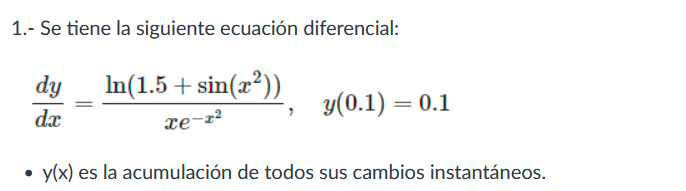

In [28]:
import pandas as pd
import numpy as np

n = 10000

def montecarlo(f, a, b, n):
    u = np.random.uniform(a, b, n)
    return np.mean(f(u))*(b-a)
    
def f(x):
    return np.log(1.5 + np.sin(x**2)) / (x * np.exp(-x**2))

In [29]:
montecarlo(f1, 0.1, 0.1, n)

0.0

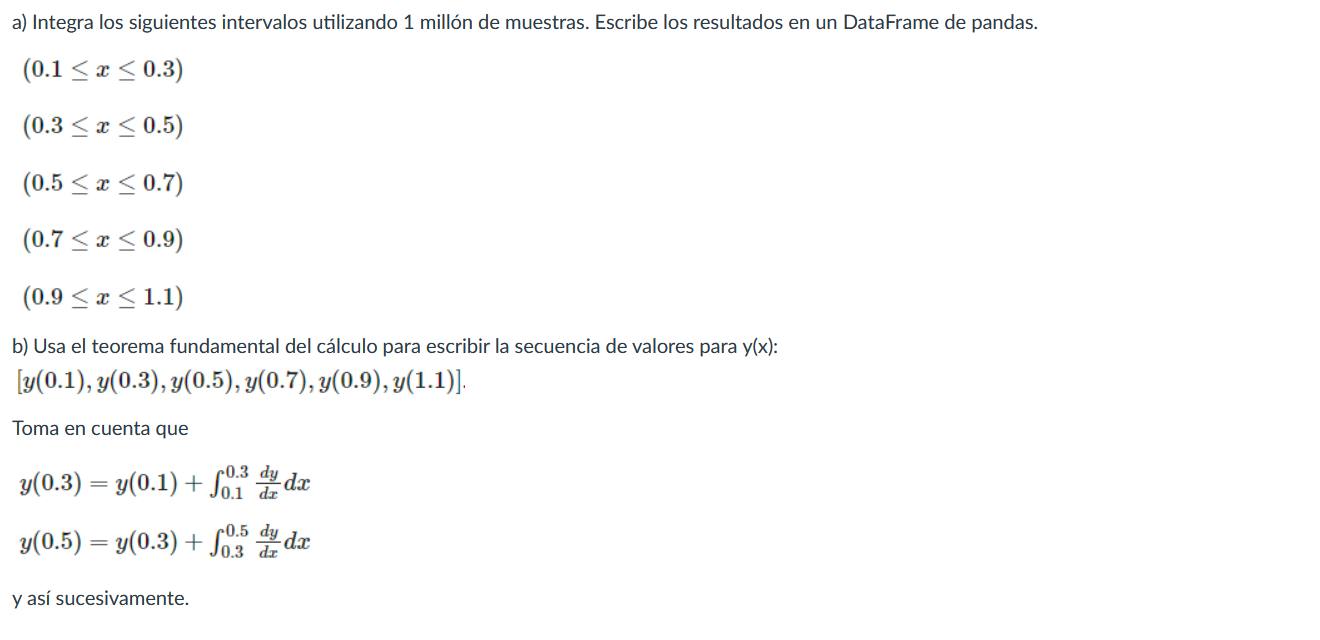

In [24]:
def montecarlo_tipo1(f, a, b, n):
    u = np.random.uniform(a, b, n)
    return np.mean(f(u))*(b-a)

In [25]:
intervalos = [
    (0.1, 0.3),
    (0.3, 0.5),
    (0.5, 0.7),
    (0.7, 0.9),
    (0.9, 1.1)
]
n = 1000000
resultados = []

for a, b in intervalos:
    df = montecarlo_tipo1(f, a, b, n)
    resultados.append({"Intervalo": f"({a}, {b})", "Integral": df})
tabla = pd.DataFrame(resultados)
tabla

,Intervalo,Integral
0,"(0.1, 0.3)",0.489714
1,"(0.3, 0.5)",0.302103
2,"(0.5, 0.7)",0.296826
3,"(0.7, 0.9)",0.353389
4,"(0.9, 1.1)",0.465379


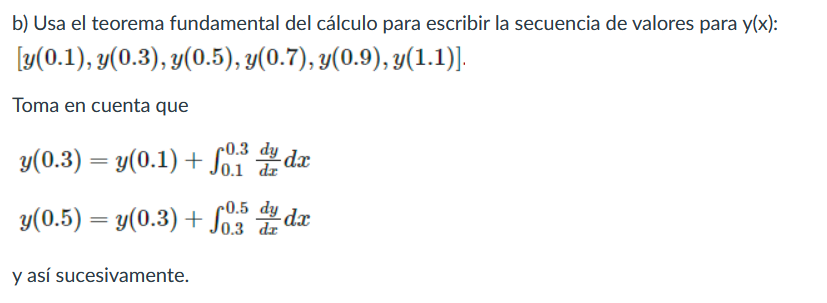

In [27]:
y = [0.1]  

for (a, b) in intervalos:
    integral = montecarlo_tipo1(f, a, b, n)
    y1 = y[-1] + integral
    y.append(y1)

x = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1]
resultados = pd.DataFrame({"x": x, "y(x)": y})
resultados

,x,y(x)
0,0.1,0.100000
1,0.3,0.589676
2,0.5,0.891793
3,0.7,1.188639
4,0.9,1.541993
5,1.1,2.007301


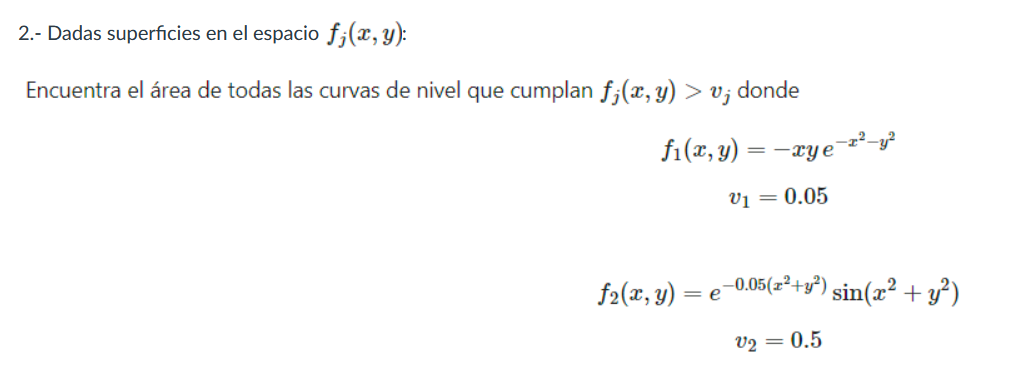

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x, y):
    return -x * y * np.exp(-2)

def f2(x, y):
    return np.exp(-0.05 * (x**2 + y**2)) * np.sin(x**2 + y**2)

v1 = 0.05
v2 = 0.5
n = 1000000

def montecarlo_tipo2(region, ax, bx, ay, by, n):
    x = np.random.uniform(ax, bx, n)
    y = np.random.uniform(ay, by, n)
    Ar = (bx - ax)*(by - ay)
    return region(x, y).mean()*Ar
    
area_f1 = montecarlo_tipo2(f1, v1, n, area_range)
area_f2 = montecarlo_tipo2(f2, v2, n, area_range)
